# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
print("Imported Libraries")

Imported Libraries


In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

### Show Confusion API

In [3]:
def show_confusion(y_test, y_hat, title, size=(5,3)):
    rcParams['figure.figsize'] = size
    ax= plt.subplot()
    cm = confusion_matrix(y_test, y_hat)
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title); 
    tick_labels = ['No', 'Land']
    ax.xaxis.set_ticklabels(tick_labels)
    ax.yaxis.set_ticklabels(tick_labels) 
    plt.show() 

## TASK 1

In [4]:
Y = data.Class.to_numpy()
print('Created Y')

Created Y


## TASK 2

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)
print('Created X')

Created X


## TASK 3

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f'Train: {X_train.shape}=>{Y_train.shape}  Test: {X_test.shape}=>{Y_test.shape}')

Train: (72, 83)=>(72,)  Test: (18, 83)=>(18,)


## TASK 4&5 (Logistic Regression)

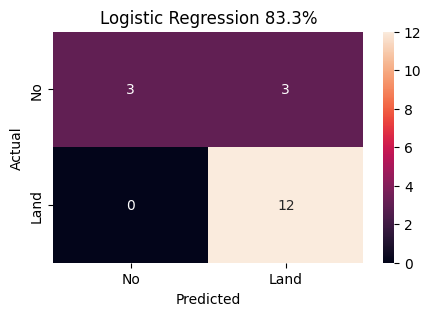

In [7]:
parameters ={'C':       [0.001,  0.01,  0.1,   1,  10],
             'penalty': ['l2'],
             'solver':  ['lbfgs']}
lr_cv = GridSearchCV(LogisticRegression(), parameters, cv=10)
lr_cv.fit(X_train, Y_train)
yhat_lr = lr_cv.predict(X_test)
show_confusion(Y_test, yhat_lr, f'Logistic Regression {lr_cv.score(X_test,Y_test)*100:.1f}%')

## TASK 6&7 (Support Vector)

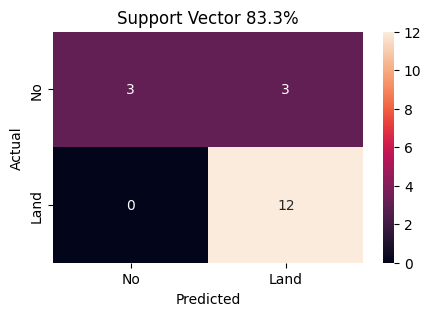

In [8]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svc_cv = GridSearchCV(SVC(), parameters, cv=10)
svc_cv.fit(X_train, Y_train)
yhat_svc = svc_cv.predict(X_test)
show_confusion(Y_test, yhat_svc, f'Support Vector {svc_cv.score(X_test,Y_test)*100:.1f}%')

## TSDK 8&9 (Decision Tree)

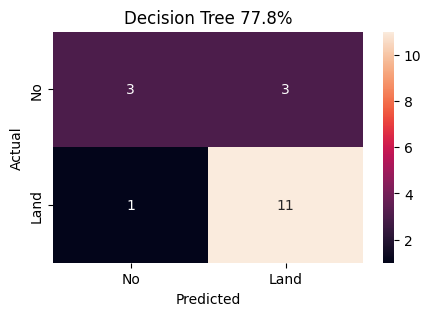

In [9]:
parameters = {'criterion':         ['gini', 'entropy'],
              'splitter':          ['best', 'random'],
              'max_depth':         [2*n for n in range(1, 10)],
              'max_features':      ['sqrt', 'log2'],
              'min_samples_leaf':  [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
tree_cv.fit(X_train, Y_train)
yhat_tree = tree_cv.predict(X_test)
show_confusion(Y_test, yhat_tree, f'Decision Tree {tree_cv.score(X_test,Y_test)*100:.1f}%')

## TASK 10&11 (k-Nearest Neighbor)

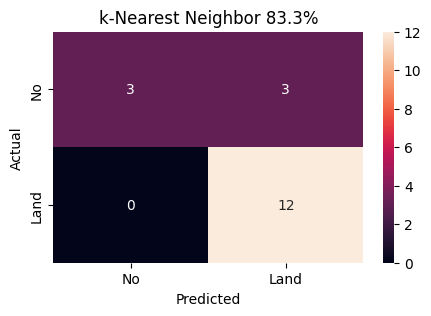

In [10]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn_cv = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
knn_cv.fit(X_train, Y_train)
yhat_knn = knn_cv.predict(X_test)
show_confusion(Y_test, yhat_knn, f'k-Nearest Neighbor {knn_cv.score(X_test,Y_test)*100:.1f}%')

## TASK 12 (Model Evaluation)

In [11]:
print(f'Logistic Regression: {lr_cv.score(X_test,Y_test)*100:.3f}%')
print(f'Support Vector: {svc_cv.score(X_test,Y_test)*100:.3f}%')
print(f'Decision Tree: {tree_cv.score(X_test,Y_test)*100:.3f}%')
print(f'K Nearest Neighbor: {knn_cv.score(X_test,Y_test)*100:.3f}%')

Logistic Regression: 83.333%
Support Vector: 83.333%
Decision Tree: 77.778%
K Nearest Neighbor: 83.333%


### Distribution

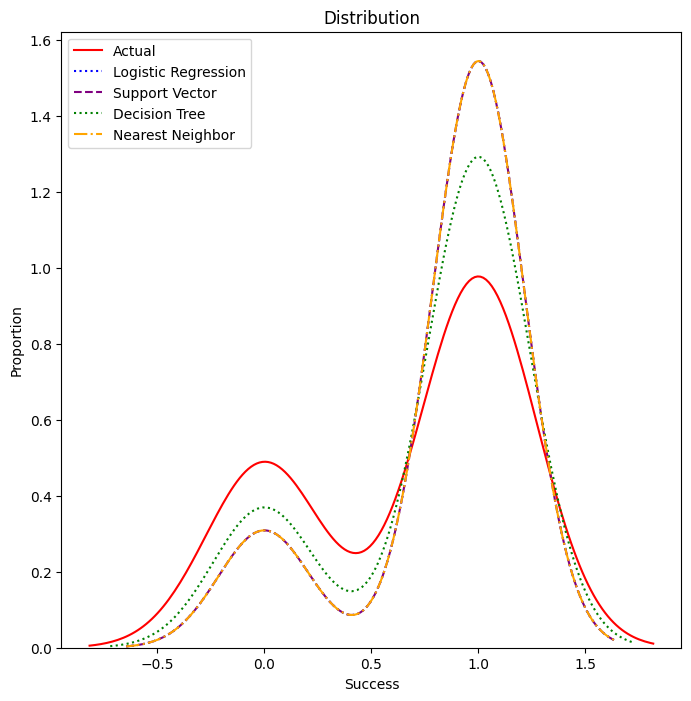

In [12]:
rcParams['figure.figsize'] = (8,8)
ax1 = sns.kdeplot(Y_test, color="red", label='Actual')
sns.kdeplot(yhat_lr,   color="blue",   label='Logistic Regression', linestyle=':', ax=ax1)
sns.kdeplot(yhat_svc,  color="purple", label='Support Vector', linestyle='--', ax=ax1)
sns.kdeplot(yhat_tree, color="green",  label='Decision Tree', linestyle=':', ax=ax1)
sns.kdeplot(yhat_knn,  color="orange", label='Nearest Neighbor', linestyle='-.', ax=ax1)
plt.title('Distribution')
plt.xlabel('Success')
plt.ylabel('Proportion')
plt.legend()
plt.show()

**They're all equally accurate, although, occasionally, Decision Tree will give a different result, sometimes better, sometimes worse.**